## CAR NUMBER PLATE DETECTION



In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/car-plate-detection")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 203M/203M [01:15<00:00, 2.80MB/s]

Extracting files...


Path to dataset files: C:\Users\samma\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1


In [26]:
# ! mv "/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1" "/content/sample_data"

In [11]:
import os
import shutil

source_path = r"C:\Users\samma\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1"

destination_path = os.getcwd()

print("Moving dataset from:")
print(source_path)
print("To current directory:")
print(destination_path)

for item in os.listdir(source_path):
    s = os.path.join(source_path, item)
    d = os.path.join(destination_path, item)
    shutil.move(s, d)

print("✅ Dataset moved to current working directory!")


Moving dataset from:
C:\Users\samma\.cache\kagglehub\datasets\andrewmvd\car-plate-detection\versions\1
To current directory:
C:\Users\samma\OneDrive\Documents\VIT Mtech\Sem 2\Labs\Edge Intelligence\Plate_detection
✅ Dataset moved to current working directory!


In [3]:
import numpy as np
import xml.etree.ElementTree as ET
import os
import glob
import pandas as pd
import cv2

In [12]:


img_dir = "images"

# get all image files (jpg + png)
files = glob.glob(os.path.join(img_dir, "*.jpg"))
files += glob.glob(os.path.join(img_dir, "*.png"))

files.sort()
print("Total images found:", len(files))

# storing in X
IMAGE_SIZE = 224
X = []

for f1 in files:
    img = cv2.imread(f1)
    
    if img is None:
        print("Error loading:", f1)
        continue
        
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    X.append(img)

X = np.array(X)
print("Dataset shape:", X.shape)


Total images found: 433
Dataset shape: (433, 224, 224, 3)


In [5]:
len(X)

0

In [7]:
!pip install lxml

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/4.0 MB 1.0 MB/s eta 0:00:04
   ------- -------------------------------- 0.8/4.0 MB 1.3 MB/s eta 0:00:03
   ---------- ----------------------------- 1.0/4.0 MB 1.1 MB/s eta 0:00:03
   ---------- ----------------------------- 1.0/4.0 MB 1.1 MB/s eta 0:00:03
   --------------- ------------------------ 1.6/4.0 MB 1.2 MB/s eta 0:00:03
   -------------------- ------------------- 2.1/4.0 MB 1.3 MB/s eta 0:00:02
   ------------------------- -------------- 2.6/4.0 MB 1.5 MB/s eta 0:00:01
   ---------------------------- ----------- 2.9/4.0 MB 1.6 MB/s eta 0:00:01
   --------------------------------- ------ 3.4/4.0 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 1.7 MB/s eta 0:00:00


In [14]:
from lxml import etree
import os

def resizeannotation(f):
    tree = etree.parse(f)
    
    # original image size
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    
    # bounding box
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text) / (width / IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text) / (height / IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text) / (width / IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text) / (height / IMAGE_SIZE)

    return [int(xmin), int(ymin), int(xmax), int(ymax)]


ann_path = "annotations"

# get all xml files
text_files = [os.path.join(ann_path, f) for f in sorted(os.listdir(ann_path)) if f.endswith(".xml")]

print("Total annotations:", len(text_files))

# storing in y
y = []
for file in text_files:
    y.append(resizeannotation(file))

y = np.array(y)
print("Annotation shape:", y.shape)


Total annotations: 433
Annotation shape: (433, 4)


In [15]:
len(y)

433

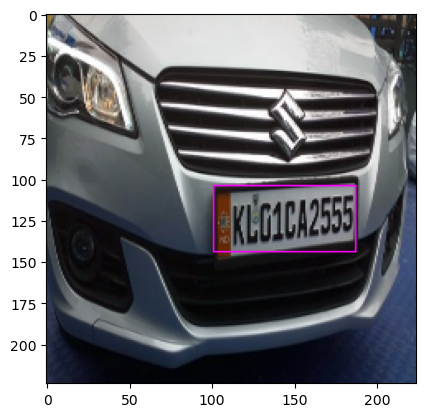

In [16]:
import matplotlib.pyplot as plt

image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(255, 0, 255))
plt.imshow(image)
plt.show()

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
X.shape

(433, 224, 224, 3)

In [19]:
y.shape

(433, 4)

In [20]:
X = X / 255
y = y / 255

In [21]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [22]:
from tensorflow.keras.layers import Dense ,  Conv2D , MaxPooling2D , Dropout , Flatten

from tensorflow.keras import Input , Sequential

model = Sequential([
    Input(shape = (224,224,3)) ,
    Conv2D(filters = 32 , kernel_size = 3 , activation = "relu"),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(filters = 64 , kernel_size = 3 , activation = "relu"),
    MaxPooling2D((2,2)),
    Conv2D(128 , kernel_size = 3 , activation = "relu"),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    Flatten(),
    Dense(64 , activation = "relu"),
    Dropout(0.3),
    Dense(128 , activation = "relu"),
    Dense(4 , activation = "sigmoid" )


])

C:\Users\samma\anaconda3\envs\GopiMllab\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\samma\anaconda3\envs\GopiMllab\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\samma\anaconda3\envs\GopiMllab\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the g

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,639,940 (21.51 MB)

 Trainable params: 5,639,940 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer = "adam" , loss = "mean_squared_error" , metrics = ["accuracy"])

In [27]:
history = model.fit(x_train , y_train , epochs = 100 ,  batch_size=32  )

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 752ms/step - accuracy: 0.9075 - loss: 0.0018
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 744ms/step - accuracy: 0.9133 - loss: 0.0018
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 749ms/step - accuracy: 0.9220 - loss: 0.0017
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 738ms/step - accuracy: 0.9306 - loss: 0.0018
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 751ms/step - accuracy: 0.9162 - loss: 0.0019
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 746ms/step - accuracy: 0.9249 - loss: 0.0018
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 746ms/step - accuracy: 0.9249 - loss: 0.0018
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 748ms/step - accuracy: 0.9306 - loss: 0.0016
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 754ms/step - accuracy: 0.9249 - loss: 0.0017
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 741ms/step - accuracy: 0.9133 - loss: 0.0017
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 744ms/step - accuracy: 0.9220 - loss: 0.0019
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 9